# Clustering 

In [ ]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import scipy.stats as st
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, cut_tree
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import subprocess
import geopandas as gpd
import geopy.distance
from geopy.distance import geodesic
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Circle
from matplotlib.patches import Ellipse


In [52]:
#Importation de fichiers
newbd2017 = pd.read_csv('newbd.csv')


In [53]:
newbd2017

,Unnamed: 0,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Latitude,Longitude,Distance_FR
0,0,Afrique du Sud,143.0,35.69,14.11,2118.0,63.0,514.0,2035.0,1667.0,-0.0,57009,-28.816624,24.991639,8670.232479
1,1,Albanie,85.0,16.36,6.26,47.0,0.0,38.0,47.0,13.0,4.0,2884,-32.000111,18.555780,8864.865221
2,2,Algérie,22.0,6.38,1.97,277.0,0.0,2.0,264.0,275.0,0.0,41389,28.000027,2.999983,2067.002227
3,3,Allemagne,71.0,19.47,7.96,1739.0,646.0,842.0,1609.0,1514.0,-29.0,82658,49.147899,-0.375321,329.688250
4,4,Angola,35.0,10.56,3.60,319.0,0.0,277.0,315.0,42.0,-0.0,29816,-11.877577,17.569124,6663.383921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,120,Zambie,11.0,3.42,1.15,60.0,1.0,12.0,58.0,49.0,-0.0,16853,-14.518912,27.558988,7240.673367
118,121,Égypte,50.0,12.96,4.51,1250.0,1.0,110.0,1250.0,1118.0,-23.0,96442,26.254049,29.267547,3304.197529
119,122,Émirats arabes unis,147.0,43.47,14.80,412.0,94.0,433.0,412.0,48.0,-26.0,9487,24.000249,53.999483,5241.154134
120,123,Équateur,83.0,19.31,6.15,341.0,0.0,0.0,324.0,340.0,-1.0,16785,0.606015,18.780073,5355.472384


/var/folders/cy/t20bxd4s1n30wgrjxd5xxwpr0000gn/T/ipykernel_56111/3421865178.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


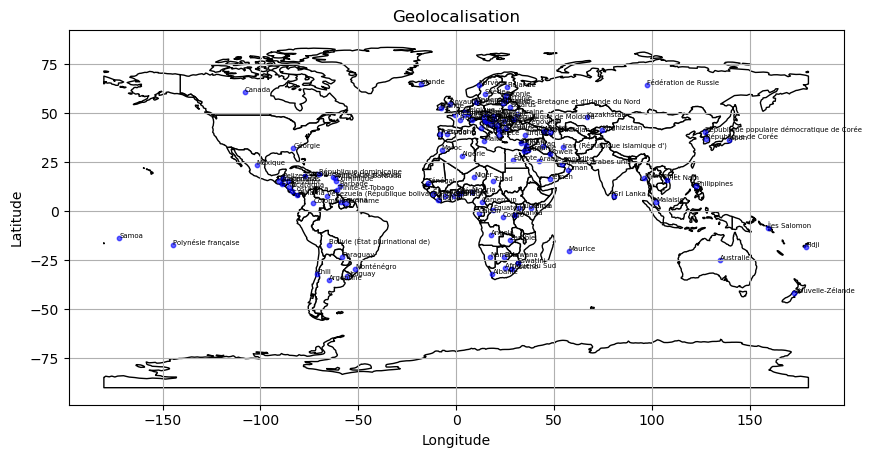

In [54]:
# Extraire les données de géolocalisation
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# monde
world.plot(figsize=(10, 8), color='w', edgecolor='black')

# point geolocalisation
plt.scatter(newbd2017['Longitude'], newbd2017['Latitude'], color='b', s=10, alpha=0.6)

# Etiquette
for i, txt in enumerate(newbd2017['Zone']):
    plt.annotate(txt, (newbd2017['Longitude'][i], newbd2017['Latitude'][i]), fontsize=5)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geolocalisation')
plt.grid(True)
plt.show()





Pour choisir les meilleurs pays pour exporter de la viande de volailles, il faut considérer les critères suivants :

- Demande de viande de volailles : Rechercher les pays avec une moins production de viande de volailles, ce qui pourrait indiquer un marché réceptif pour les exportations.

- Tendances de consommation : les pays avec plus population.

- Réglementations commerciales : Considérer les pays plus proche de France.

# ACP - Analyse en Composantes Principales
-  Technique de réduction de la dimensionnalité qui consiste à transformer un ensemble de variables corrélées en un nouvel ensemble de variables non corrélées, appelées composantes principales. Ces composantes principales sont ordonnées par leur variance, de telle sorte que la première composante principale capture autant de variabilité que possible dans les données, la deuxième capture la variabilité restante, et ainsi de suite. L'ACP est largement utilisée pour explorer et visualiser des données complexes, identifier des tendances et des structures cachées, et réduire le bruit dans les données.

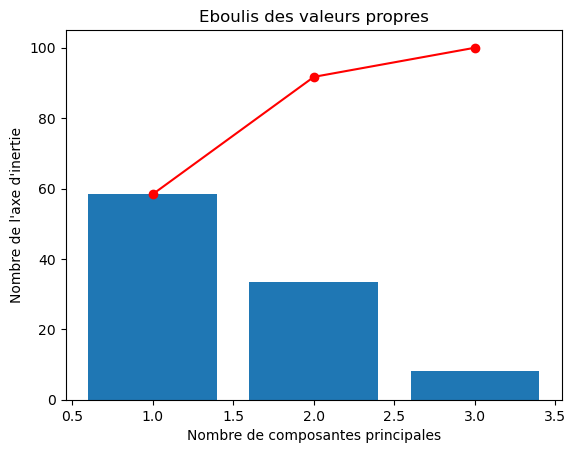

In [63]:
# Sélection des colonnes numériques pour l'ACP
colonnes_numeriques = ['Production', 'Population', 'Distance_FR']
X = newbd2017[colonnes_numeriques]

# Standardisation des données
X_standard = StandardScaler().fit_transform(X)

# Appliquer l'Analyse en Composantes Principales (ACP)
pca = PCA()
X_pca = pca.fit_transform(X_standard)

# Ébouli des valeurs propres
plt.bar(variables_compo, scree)
plt.plot(variables_compo, scree.cumsum(), c="red", marker="o")

plt.xlabel("Nombre de composantes principales")
plt.ylabel("Nombre de l'axe d'inertie")
plt.title("Eboulis des valeurs propres")

plt.show(block=False)

In [60]:
# Scaling
X_pca
# Calcul des composantes principales
n_components = 3
# Définir une variable et composantes
variables_compo = range(1, n_components+1)

pca = PCA(n_components = n_components)

# On l'entraine sur nos données actuelles
pca.fit(X_pca)


PCA(n_components=3)

In [61]:
list(variables_compo)

[1, 2, 3]

In [62]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([58.41, 33.31,  8.28])

- Explication

L'éboulis des valeurs propres (ou scree plot) est un graphique qui permet de visualiser la proportion de la variance totale expliquée par chaque composante principale lors d'une analyse en composantes principales (ACP). 

Interprétation du graphique

Axes du graphique :

L'axe horizontal (x) représente le nombre de composantes principales.
L'axe vertical (y) représente la variance expliquée cumulée, c'est-à-dire la proportion de la variance totale des données qui est expliquée par les composantes principales ajoutées jusqu'à ce point.

Points du graphique :

Chaque point sur le graphique représente une composante principale. La hauteur du point indique la proportion de la variance totale expliquée par cette composante et toutes les composantes précédentes.

Explication des résultats

- Première composante principale (CP1) :

La première composante principale explique environ 58,41% de la variance totale est expliquée cumulativement. La deuxième composante ajoute donc environ 33,31% de la variance supplémentaires.

- Deuxième composante principale (CP2) :
En ajoutant la deuxième composante principale, environ 91,72% de la variance totale est expliquée cumulativement. Cette composante ajoute environ 25% de la variance supplémentaire.

- Troisième composante principale (CP3) : 

Avec la troisième composante principale, pratiquement 100% de la variance totale est expliquée. Cette dernière composante ajoute environ 10% de la variance restante.

Choix du nombre de composantes principales

Pour déterminer le nombre optimal de composantes principales à conserver, on utilise souvent le critère de l'éboulis. Voici quelques points à considérer :

Critère du coude (Elbow Method) :

On recherche un "coude" dans le graphique, c'est-à-dire un point après lequel l'ajout de nouvelles composantes principales n'ajoute que peu de variance expliquée supplémentaire. Dans ce cas, le coude semble se situer autour de la deuxième ou troisième composante principale.

On peut donc envisager de conserver 1 ou 2 composantes principales, car elles expliquent déjà une grande partie de la variance totale (75% à 90%).

Variance expliquée suffisante :

Un autre critère courant est de choisir un nombre de composantes principales qui expliquent un certain pourcentage de la variance totale, par exemple 85% à 95%. Ici, conserver les trois  composantes principales semble raisonnable, car elles expliquent + 90% de la variance totale.


- Conclusion

En résumé, le graphique montre que les deux composantes principales expliquent 90% de la variance totale, ce qui est une proportion significative. Le choix de conserver 2 ou 3 composantes principales serait justifié selon les critères de l'éboulis et de la variance expliquée et à continuation les methodes pour trouver les meillers pays afin d'exporter nos viandes volailles.

Nombre de composantes principales retenues : 2


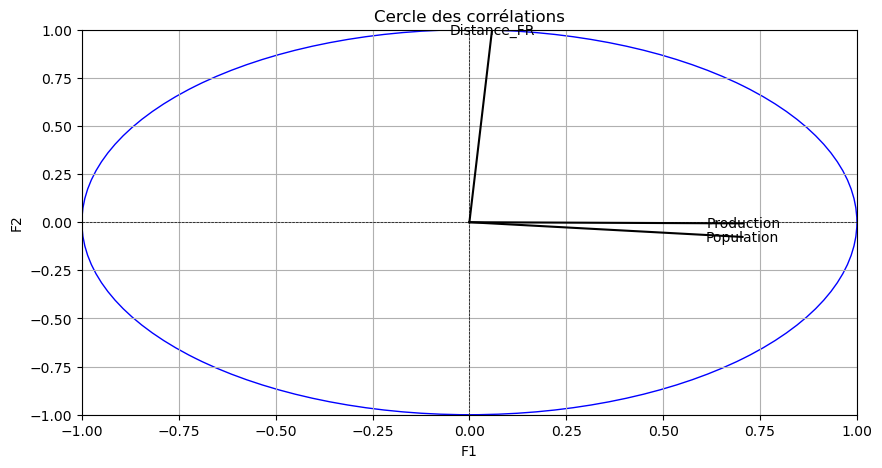

In [64]:
# Justification du nombre de dimensions retenues
# Retenons que les 2 premières composantes principales expliquent le + 90% de la variance.
n_composantes = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
print(f"Nombre de composantes principales retenues : {n_composantes}")

# Cercle des corrélations
fig, ax = plt.subplots(figsize=(10, 5))
circle = plt.Circle((0, 0), 1, color='b', fill=False)
ax.add_artist(circle)

for i, (x, y) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    plt.plot([0, x], [0, y], color='k')
    plt.text(x, y, colonnes_numeriques[i], ha='center', va='center')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Cercle des corrélations')
plt.grid(True)
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.show()

- Explication:
Les variables "Production" et "Population" sont fortement corrélées (pasliées), il peut être bénéfique de développer des politiques et des stratégies qui tiennent compte de leur interdépendance. Par exemple, des investissements dans l'infrastructure de production peuvent avoir des effets positifs sur la population locale et per contre la population est negatif vers la production.

Étant donné que "Distance" a de contribution positif sur l'axe F2. Cela pourrait impliquer des disparités géographiques qui nécessitent des approches spécifiques pour équilibrer leur impact.

Alors maintenant je vous montre le methodes afin de choisir le meilleurs clusters.

# DAH - Dendrogramme Classification Hiérarchique Ascedante
 - Fournit une visualisation intuitive de la manière dont les éléments sont regroupés en fonction de leur similitude et de leur dissimilarité. 
 - Il aide à identifier les motifs de regroupement et à comprendre la structure des données dans une analyse de regroupement hiérarchique.




/var/folders/cy/t20bxd4s1n30wgrjxd5xxwpr0000gn/T/ipykernel_56111/499875288.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newbd2017_numeric.dropna(inplace=True)


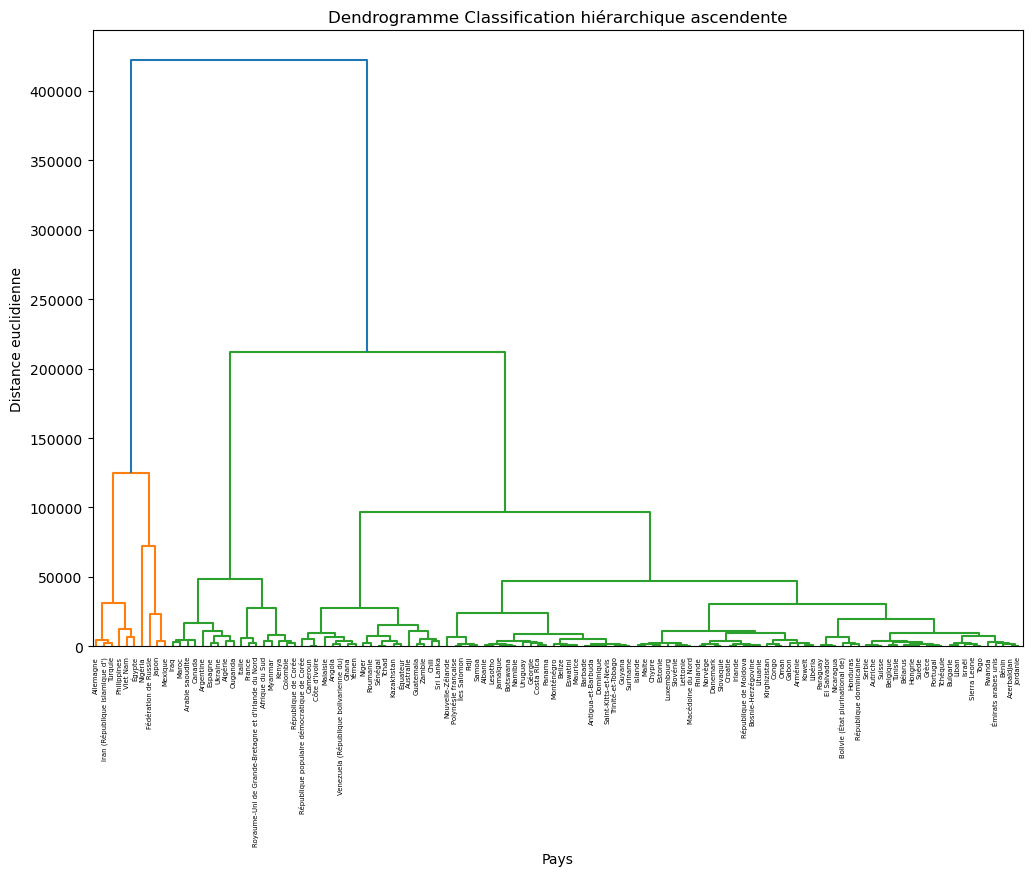

In [101]:
# Creation du dendrogramme:
numeric_columns = newbd2017.select_dtypes(include=[np.number]).columns
newbd2017_numeric = newbd2017[numeric_columns]

# Vérifier si des valeurs manquantes existent et supprimer les lignes correspondantes si c'est le cas
newbd2017_numeric.dropna(inplace=True)

# Calculer la matrice de linkage
Z = linkage(newbd2017_numeric, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=newbd2017['Zone'].values, leaf_rotation=90, orientation="top")
plt.title('Dendrogramme Classification hiérarchique ascendente')
plt.xlabel('Pays')
plt.ylabel('Distance euclidienne')
plt.axhline(y=500000, color='r', linestyle='--') 
plt.show()

#  Étude des clusters - méthode CHA

In [87]:
newbd2017['Cluster'] = clusters

# Découpage
max_d = 50000
clusters = fcluster(Z, max_d, criterion='distance')
clusters


array([4, 6, 4, 1, 5, 6, 4, 4, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5,
       4, 5, 6, 4, 6, 6, 6, 5, 6, 6, 6, 4, 6, 6, 6, 6, 4, 2, 6, 5, 6, 5,
       6, 6, 6, 6, 1, 4, 6, 6, 6, 4, 6, 2, 6, 5, 4, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 6, 4, 6, 2, 6, 4, 6, 6, 5, 3, 6, 6, 6, 4, 6, 6, 1, 6, 6,
       5, 4, 6, 4, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 1, 4, 6, 5, 1, 5, 5, 1, 6, 5, 6], dtype=int32)

In [93]:
# Compter le nombre de clusters distincts
num_clusters = len(np.unique(clusters))
print(f"Nombre de clusters: {num_clusters}")


Nombre de clusters: 6


In [114]:
# Afficher les clusters et les pays
for cluster_id in cluster_counts.index:
    pays_dans_cluster = newbd2017[newbd2017['Cluster'] == cluster_id]['Zone'].tolist()
    print(f"Cluster {cluster_id} : {len(pays_dans_cluster)} pays")
    print(", ".join(pays_dans_cluster))
    print()

Cluster 6 : 76 pays
Albanie, Antigua-et-Barbuda, Arménie, Autriche, Azerbaïdjan, Barbade, Belgique, Belize, Bolivie (État plurinational de), Bosnie-Herzégovine, Botswana, Bulgarie, Bélarus, Bénin, Chypre, Congo, Costa Rica, Croatie, Danemark, Dominique, El Salvador, Estonie, Eswatini, Fidji, Finlande, Gabon, Grèce, Guyana, Géorgie, Honduras, Hongrie, Irlande, Islande, Israël, Jamaïque, Jordanie, Kirghizistan, Koweït, Lesotho, Lettonie, Liban, Libéria, Lituanie, Luxembourg, Macédoine du Nord, Malte, Maurice, Monténégro, Namibie, Nicaragua, Norvège, Nouvelle-Zélande, Oman, Panama, Paraguay, Polynésie française, Portugal, Rwanda, République de Moldova, République dominicaine, Saint-Kitts-et-Nevis, Samoa, Serbie, Sierra Leone, Slovaquie, Slovénie, Suisse, Suriname, Suède, Tchéquie, Togo, Trinité-et-Tobago, Tunisie, Uruguay, Émirats arabes unis, Îles Salomon

Cluster 5 : 19 pays
Angola, Australie, Cameroun, Chili, Côte d'Ivoire, Ghana, Guatemala, Kazakhstan, Malaisie, Niger, Roumanie, Répub

In [115]:
# Centroïdes
# Calculer les centroides des clusters
# Sélection des colonnes d'intérêt
colonnes_interet = ['Production', 'Population', 'Distance_FR']
newbd2017_interet = newbd2017[colonnes_interet]
centroids = newbd2017.groupby('Cluster')[colonnes_interet].mean()

# Afficher les centroides des clusters
print("Centroides des clusters :")
print(centroids)

Centroides des clusters :
          Production     Population  Distance_FR
Cluster                                         
1        1531.333333   90110.166667  5373.207044
2        3302.666667  132603.000000  8231.091822
3         201.000000  190873.000000  4142.402204
4        1103.705882   47850.058824  4842.788164
5         328.315789   22432.263158  6664.316161
6         100.868421    4909.407895  5444.404310


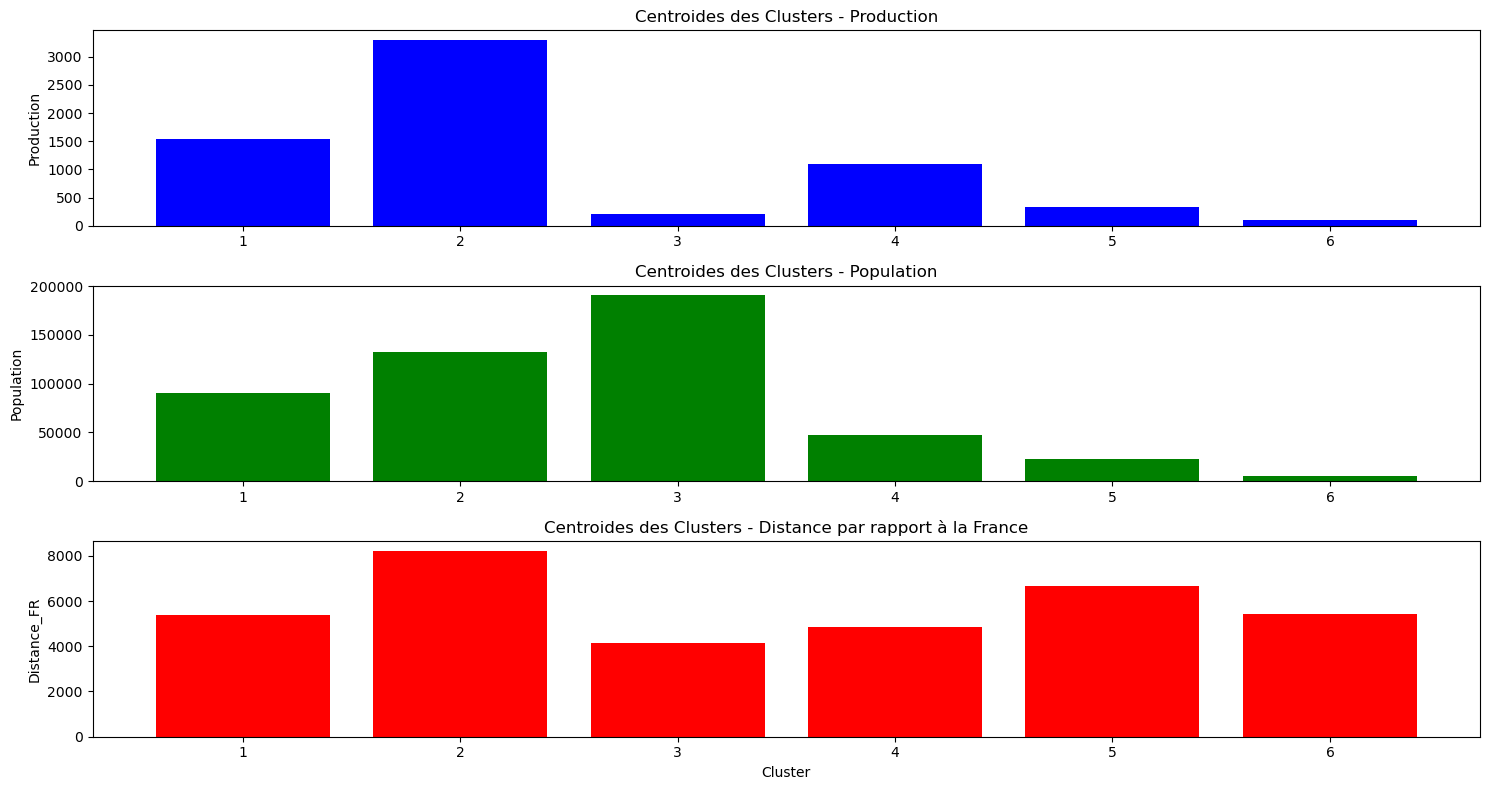

In [116]:
centroides = {
    'Cluster': [1, 2, 3, 4, 5, 6],
    'Production': [1531.333333, 3302.666667, 201.000000, 1103.705882, 328.315789, 100.868421],
    'Population': [90110.166667, 132603.000000, 190873.000000, 47850.058824, 22432.263158, 4909.407895],
    'Distance_FR': [5373.207044, 8231.091822, 4142.402204, 4842.788164, 6664.316161, 5444.404310]
}

# Conversion en DataFrame
df_centroides = pd.DataFrame(centroides)

# Création du graphique
plt.figure(figsize=(15, 8))

# Graphique pour la Production
plt.subplot(3, 1, 1)
plt.bar(df_centroides['Cluster'], df_centroides['Production'], color='blue')
plt.title('Centroides des Clusters - Production')
plt.ylabel('Production')

# Graphique pour la Population
plt.subplot(3, 1, 2)
plt.bar(df_centroides['Cluster'], df_centroides['Population'], color='green')
plt.title('Centroides des Clusters - Population')
plt.ylabel('Population')

# Graphique pour la Distance par rapport à la France
plt.subplot(3, 1, 3)
plt.bar(df_centroides['Cluster'], df_centroides['Distance_FR'], color='red')
plt.title('Centroides des Clusters - Distance par rapport à la France')
plt.xlabel('Cluster')
plt.ylabel('Distance_FR')

plt.tight_layout()
plt.show()

Interpretations et recomendation
En révisant les centroides et les priorités :

Production faible : Clusters 6, 3, 5
Population élevée : Cluster 3, 1, 2
Proximité par rapport à la France : Clusters 3, 4, 1
Le Cluster 3 a les caractéristiques suivantes :

Production faible (201.00)
Population très élevée (190873.00)
Proximité relative à la France (4142.40)
Bien que le Cluster 3 contienne un seul pays (Nigéria), il répond le mieux aux priorités données (production faible, population élevée et proximité par rapport à la France).

Pays dans le Cluster 3 :
Nigéria

Le Cluster 3 est le plus optimal malgré qu'il ne contienne qu'un seul pays, car il correspond parfaitement aux priorités : faible production, grande population et proximité relative à la France.
On continue avec les autres methodes des clusters.

# K-means

Algorithme de clustering avec un objectif de diviser un ensemble de données en un certain nombre de groupes compacts et cohérents, appelés clusters. Il fonctionne en itérant pour assigner chaque point de données à l'un des K clusters, en minimisant la variance intra-cluster.

- La méthode du coude (elbow method) est une technique utilisée pour déterminer le nombre optimal de clusters dans un ensemble de données. Elle trace la variation de la distorsion (inertie) en fonction du nombre de clusters. Le "coude" dans le graphique indique le point où l'ajout d'un cluster supplémentaire n'apporte pas une réduction significative de la distorsion, ce qui suggère le nombre optimal de clusters.

- La méthode de la silhouette (silhouette method) évalue la qualité d'un clustering en mesurant à quel point chaque objet est similaire à son propre cluster par rapport aux autres clusters. Le score de silhouette varie de -1 à 1, où une valeur proche de 1 indique que l'objet est bien placé dans son propre cluster et loin des autres clusters. Un score de silhouette élevé indique une bonne séparation entre les clusters.

/Users/psmontas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/psmontas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/psmontas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/psmontas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/p

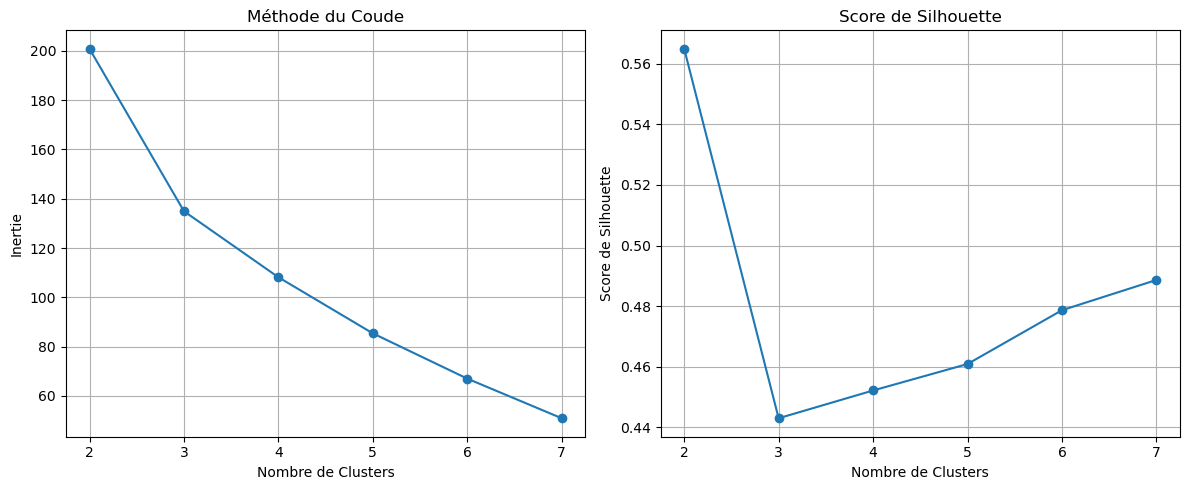

In [118]:
# Sélection des colonnes selon mes critères
X = newbd2017[['Production', 'Population', 'Distance_FR']]

# Standardisation des données
X_standard = StandardScaler().fit_transform(X)

# Méthode du coude et score de silhouette pour déterminer le nombre optimal de clusters
inertia = []
silhouette_scores = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_standard)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_standard, kmeans.labels_))

plt.figure(figsize=(12, 5))

# Méthode du coude
plt.subplot(1, 2, 1)
plt.plot(range(2, 8), inertia, marker='o')
plt.title('Méthode du Coude')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Inertie')
plt.grid(True)

# Score de silhouette
plt.subplot(1, 2, 2)
plt.plot(range(2, 8), silhouette_scores, marker='o')
plt.title('Score de Silhouette')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Score de Silhouette')
plt.grid(True)

plt.tight_layout()
plt.show()



# Explication et recommendation
- Graphique de la Méthode du Coude :

Axe horizontal (x) : Nombre de clusters (de 2 à 7 dans ce cas).
Axe vertical (y) : Inertie, qui représente la somme des distances au carré entre chaque point et le centre de son cluster (aussi appelée somme des erreurs quadratiques ou SSE).

Interprétation du graphique :

La méthode du coude permet de déterminer le nombre optimal de clusters en observant la courbe de l'inertie en fonction du nombre de clusters.
On observe un coude clair à 3 clusters. Après ce point, l'inertie continue de diminuer mais à un rythme moins rapide, indiquant que l'ajout de clusters supplémentaires apporte moins de bénéfices significatifs.

- Graphique du Score de Silhouette :

Axe horizontal (x) : Nombre de clusters (de 2 à 7 dans ce cas).
Axe vertical (y) : Score de silhouette moyen pour les différents nombres de clusters.

Interprétation du graphique :

Le score de silhouette mesure la cohésion et la séparation des clusters.
Le score le plus élevé (environ 0,56) est atteint avec 2 clusters. Cela indique que, bien que l'inertie suggère 3 clusters, les données sont globalement plus compactes et mieux séparées avec 2 clusters.
Cependant, les scores de silhouette pour 3 et 4 clusters sont également raisonnablement bons, indiquant des configurations de clustering acceptables.

Conclusion

En utilisant 3 clusters, nous avons un équilibre entre inertie et score de silhouette.
Les clusters peuvent être interprétés comme suit :
Cluster 0 : Comprend des pays avec une production modérément faible, une population intermédiaire et une distance raisonnable par rapport à la France.
Cluster 1 : Comprend des pays avec une production très faible, une population plus faible, mais très éloignés de la France.
Cluster 2 : Inclut des pays avec une production élevée, une grande population, mais une distance plus importante de la France.
Conclusion Finale :
Cluster 0 semble être le plus optimal selon les priorités, car il combine une production de viande de volaille modérément faible, une population intermédiaire (mais plus élevée que celle du cluster 1), et une proximité raisonnable par rapport à la France.
Les clusters 1 et 2 ne répondent pas aussi bien à toutes les priorités simultanément.
Par conséquent, avec 3 clusters, le Cluster 0 est celui qui répond le mieux à les priorités en termes de production, population et proximité avec la France.

In [ ]:
# Nombre optimal de clusters (par exemple, 3)
optimal_clusters = 3

# Appliquer le clustering KMeans
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_standard)
clusters = kmeans.labels_

# Ajouter les clusters au DataFrame d'origine
newbd2017['Cluster'] = clusters

# Afficher les pays par cluster avec la quantité
for i in range(optimal_clusters):
    pays_cluster = newbd2017[newbd2017['Cluster'] == i]['Zone'].tolist()
    print(f"Cluster {i}: {len(pays_cluster)} pays")
    print(pays_cluster)

In [149]:
# Sélection des colonnes selon mes critères
X = newbd2017[['Production', 'Population', 'Distance_FR']]

# Standardisation des données
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# Déterminer le nombre optimal de clusters
# D'après les graphiques obtenus, supposons que le nombre optimal de clusters est 3
optimal_clusters = 3

# Appliquer KMeans avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
kmeans.fit(X_standard)

# Obtenir les centroides
centroides = kmeans.cluster_centers_

# Afficher les centroides dans le format original (après dé-standardisation)
centroides_original = scaler.inverse_transform(centroides)

# Création d'un DataFrame pour afficher les centroides
centroides_df = pd.DataFrame(centroides_original, columns=['Production', 'Population', 'Distance_FR'])
centroides_df.index.name = 'Cluster'
print("Centroides des clusters :")
print(centroides_df)

Centroides des clusters :
         Production    Population  Distance_FR
Cluster                                       
0         139.52459  11992.704918  2971.828501
1         158.90000   8169.375000  9550.085647
2        1766.52381  80180.571429  5738.766140


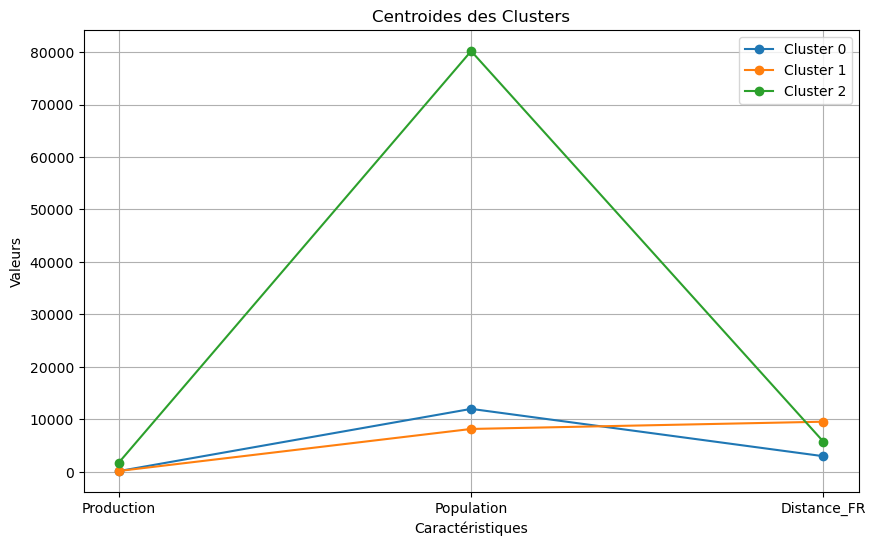

In [150]:
# Création du graphique
plt.figure(figsize=(10, 6))

# Affichage des centroides pour chaque caractéristique
for i, centroid in centroides_df.iterrows():
    plt.plot(['Production', 'Population', 'Distance_FR'], centroid, marker='o', label=f'Cluster {i}')

# Configuration du graphique
plt.title('Centroides des Clusters')
plt.xlabel('Caractéristiques')
plt.ylabel('Valeurs')
plt.legend()
plt.grid(True)
plt.show()

- Explication
En tenant compte des critères prioritaires :

La production la plus faible est dans le Cluster 0.
La population la plus élevée est dans le Cluster 2, mais elle a une production très élevée.
La proximité de la France est la meilleure dans le Cluster 0.

Étant donné que la priorité principale est une production faible et une proximité à la France, le Cluster 0 est le plus optimal car il a la production la plus faible et est le plus proche de la France, même si la population n'est pas la plus élevée.

Donc, le Cluster 0 est le plus optimal selon vos critères.
Cluster 0:
Afrique du Sud', 'Algérie', 'Allemagne', 'Angola', 'Arabie saoudite', 'Argentine', 'Canada', 'Colombie', 'Espagne', 'France', 'Ghana', "Iran (République islamique d')", 'Iraq', 'Italie', 'Kenya', 'Malaisie', 'Maroc', 'Myanmar', 'Ouganda', "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord", 'République de Corée', 'Turquie', 'Ukraine', 'Venezuela (République bolivarienne du

- Projection des individus avec PCA

/Users/psmontas/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


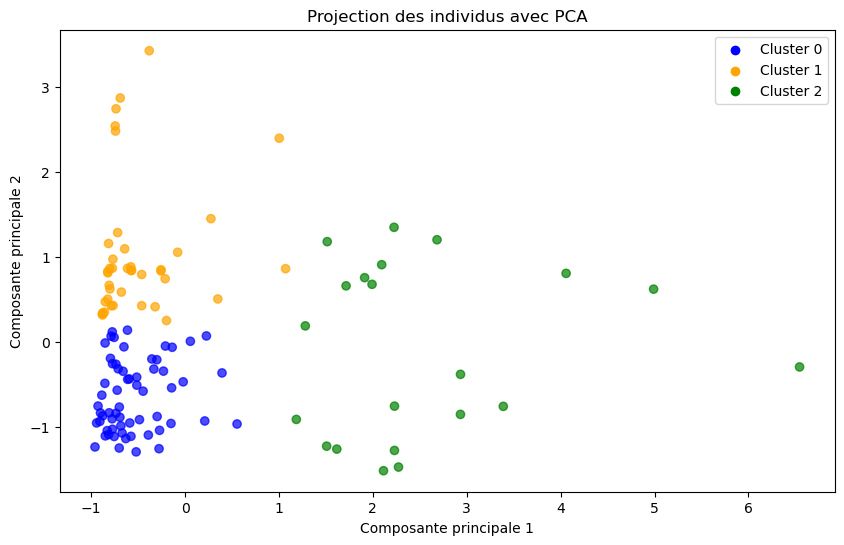

In [153]:
# 1. Sélection des colonnes selon vos critères
X = newbd2017[['Production', 'Population', 'Distance_FR']]

# 2. Standardisation des données
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

# 3. Application de PCA pour réduire les dimensions à 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standard)

# 4. Exécution de K-Means pour obtenir les clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Utilisez le nombre optimal de clusters déterminé précédemment
kmeans.fit(X_standard)
labels = kmeans.labels_

# 5. Création du scatter plot pour visualiser les clusters avec les couleurs spécifiées
colors = {0: 'blue', 1: 'orange', 2: 'green'}
colored_labels = [colors[label] for label in labels]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colored_labels, alpha=0.7)
plt.title('Projection des individus avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')

# Ajout de la légende
for label in colors:
    plt.scatter([], [], c=colors[label], label=f'Cluster {label}')
plt.legend()

plt.show()

- Explication

Cluster 0 (Couleur bleu) : Ce cluster comprend des pays avec des valeurs plus faibles sur les deux composantes principales.

Cluster 1 (Couleur orange) : Ce cluster regroupe des pays ayant une distribution intermédiaire sur les composantes principales.

Cluster 2 (Couleur verte) : Ce cluster contient des pays avec des valeurs plus élevées sur la première composante principale.

En tenant compte de vos priorités :

Moindre production de viande de volaille
Plus grande population
Proximité avec la France
Examinons les centroides des clusters pour tirer une conclusion appropriée.

Centroides des Clusters :

Cluster 	Production	Population	Distance_FR
0	          139.52	11992.70	2971.83
1	          158.90	8169.38	    9550.09
2	          1766.52	80180.57	5738.77
Analyse :

- Cluster 0 :

Production : 139.52 (la plus faible)
Population : 11992.70
Distance_FR : 2971.83 (la plus proche)

- Cluster 1 :

Production : 158.90 (un peu plus élevée que le Cluster 0)
Population : 8169.38 (la plus faible)
Distance_FR : 9550.09 (la plus éloignée)

- Cluster 2 :

Production : 1766.52 (la plus élevée)
Population : 80180.57 (la plus élevée)
Distance_FR : 5738.77

Conclusion Optimale :

Cluster 0 est le plus approprié selon vos priorités.
Production la plus faible de viande de volaille : 139.52
Population modérée : 11992.70
Proximité maximale avec la France : 2971.83
Le Cluster 0 comprend des pays qui répondent le mieux à vos critères prioritaires : faible production de viande de volaille, population raisonnablement élevée, et proximité géographique avec la France.



- Mon analyse

In [155]:
# Demande de viande de volailles : Rechercher les pays avec une moins production de viande de volailles, ce qui pourrait indiquer un marché réceptif pour les exportations.
df_filtered = newbd2017[newbd2017['Production'] > 0]
pays_moins_prod = df_filtered.sort_values(by='Production', ascending=True)

pays_moins_prod.head()

,Unnamed: 0,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Latitude,Longitude,Distance_FR,Cluster
86,89,Polynésie française,167.0,47.40,16.20,15.0,0.0,15.0,13.0,1.0,0.0,276,-17.024375,-144.643490,15516.597419,1
61,64,Lesotho,27.0,7.93,2.72,17.0,0.0,15.0,17.0,2.0,1.0,2091,-29.603927,28.335019,8849.394522,1
67,70,Macédoine du Nord,68.0,19.73,7.01,41.0,1.0,40.0,41.0,2.0,-0.0,2081,41.617121,21.716839,1675.873097,1
69,72,Malte,103.0,27.17,12.68,14.0,0.0,9.0,12.0,4.0,-1.0,437,35.888599,14.447691,1584.819600,1
73,76,Monténégro,55.0,15.98,5.79,10.0,0.0,8.0,10.0,4.0,1.0,627,-29.682611,-51.468745,10005.639076,1


In [156]:
# DTendances de consommation : les pays avec plus population.

pays_plus_pop = newbd2017.sort_values(by='Population', ascending=False)

pays_plus_pop.head()

,Unnamed: 0,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Population,Latitude,Longitude,Distance_FR,Cluster
78,81,Nigéria,2.0,1.01,0.31,202.0,0.0,0.0,192.0,201.0,-0.0,190873,9.600036,7.999972,4142.402204,2
39,42,Fédération de Russie,104.0,30.98,10.44,4556.0,115.0,226.0,4509.0,4444.0,-1.0,145530,64.686314,97.745306,5708.569071,2
55,58,Japon,67.0,18.50,7.24,2415.0,10.0,1069.0,2359.0,2215.0,859.0,127502,36.574844,139.239418,9858.414574,2
72,75,Mexique,123.0,32.52,9.26,4219.0,9.0,972.0,4058.0,3249.0,-6.0,124777,23.658512,-102.007710,9126.291821,2
85,88,Philippines,48.0,13.87,4.65,1521.0,2.0,249.0,1459.0,1272.0,-3.0,105172,12.750349,122.731210,11195.353113,2


In [157]:
# Tri des pays en fonction de leur distance par rapport à la France dans le premier DataFrame
pays_plus_proches_1 = pays_moins_prod.sort_values(by=['Distance_FR']).head(7)

# Tri des pays en fonction de leur distance par rapport à la France dans le deuxième DataFrame
pays_plus_proches_2 = pays_plus_pop.sort_values(by=['Distance_FR']).head(7)

# Affichage des cinq pays les plus proches de la France dans chaque DataFrame
print("Cinq pays pour exporter le viandes des volailles, en respetant les critères, sont :")
print(pays_plus_proches_1['Zone'])


Cinq pays pour exporter le viandes des volailles, en respetant les critères, sont :
38        France
3      Allemagne
110      Tunisie
102       Suisse
13      Belgique
10      Autriche
53        Italie
Name: Zone, dtype: object


# Conclusion 
Après avoir appliqué differents méthodes de regroupement différentes je peux tirer quelques conclusions et recommendatios mais toujours ouverte à des propositions.

En tenant compte du critère de proximité géographique avec la France, ainsi que des autres critères tels que la production de volaille et la population, je recommanderais de sélectionner les pays suivants pour l'exportation de poulet :

- Allemagne
- Tunisie
- Suisse
- Belgique
- Autriche

Ces pays sont géographiquement proches de la France, ont une population importante et peuvent offrir un marché potentiellement intéressant pour l'exportation de poulet.
Pour réussir sur ces marchés, il est essentiel d'adapter les stratégies de marketing et de communication, de se conformer aux réglementations locales, de comprendre les besoins des consommateurs locaux et de développer des stratégies efficaces pour faire face à la concurrence locale.

- Merci